# Statistical Inference and Confidence Intervals

## Polling Example

You're running for office in a small town of 1,000 voters. Everyone in your town cares deeply about voting, so all 1,000 of them are going to vote.

You'd like to ask "All in all, do you think things in the nation are generally headed in the right direction?"

In [1]:
import numpy as np

np.random.seed(42)

In [2]:
population = np.random.binomial(n = 1,
                                p = 0.4,
                                size = 1000)

In [3]:
population[0:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

Above, we simulated a population of people where 40% of them think the country is headed in the right direction. 

**But your campaign doesn't know this. Your campaign wants to learn what the true value of $p$ is!**

The problem is, you don't have enough money and time to call all 1,000 of them. You can only call 50.

In [4]:
sample = np.random.choice(population,
                          size = 50,
                          replace = False)

In [5]:
np.mean(sample)

0.38

In [6]:
sample_2 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_2)

0.44

In [7]:
sample_3 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_3)

0.38

In [8]:
sample_4 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_4)

0.38

In [9]:
sample_5 = np.random.choice(population,
                            size = 50,
                            replace = False)
np.mean(sample_5)

0.32

When a poll is reported, you likely see something like this:

In the upper-right corner, you can see "$\text{margin of error }\pm\text{ }3.1$". 

#### What is a margin of error?
This means that it's pretty likely that these poll results are within "plus 3.1%" or "minus 3.1%" of the real value.

#### Why is there a margin of error?
We recognize that one sample of 50 people can't definitively speak for all registered voters! If I had taken a different sample of 50 people, then my results might be pretty different. We hope not, but it's entirely possible.

The margin of error is a way for us to describe our uncertainty in our statistic based on how much our statistic changes from one sample to another sample.
- Realistically, we only pull one sample of size $n$ out of all possible samples of size $n$.
- We only see one sample percentage out of all possible statistics.
- We won't ever actually **see** the sample-to-sample variability!
    - This makes sense, right? It doesn't make sense for me to take ten samples of size 50... instead, I would just take one sample of 500!
    
#### If we don't ever actually observe how much our statistic changes from one sample to another sample, then how can we get a margin of error?

There are two ways to do this:
- We can get theory to do it. (i.e. relying on statistics and probability theory)
- We can estimate it empirically from our existing data.

## Confidence Interval Based on Theory

By quantifying the margin of error, we can construct what is known as a **confidence interval**.

A confidence interval is a set of likely values for the parameter of interest.

### The Central Limit Theorem
The Central Limit Theorem is the most important theorem in all of statistics. It states:

As the size of our sample $n$ gets closer and closer to infinity, our sampling distribution (the distribution of all possible sample means) approaches a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

**In English**: This means that if I take a sample of size $n$ and find the mean of that sample, then do it for all possible samples of size $n$, this distribution of sample means should be Normally distributed as long as $n$ is big enough.

**Practically**: If I want to study the sample mean (or the sample percentage), I can use the Normal distribution to generate a confidence interval, as long as the size of our sample $n$ is large enough!

### Confidence Interval Formula

The formula for a confidence interval is:

$$
\text{[sample statistic]} \pm \text{[multiplier]} \times \text{[standard deviation of sampling distribution]}
$$

- The **sample statistic** is the statistic of our sample!
- The **standard deviation of the sampling distribution** quantifies that sample-to-sample variability for us. (This is commonly called the [standard error](https://stattrek.com/estimation/standard-error.aspx).)
- The **multiplier** is a number drawn from the Normal distribution that makes sure our confidence interval is appropriately wide given how confident we want to be in our result.
    - The **margin of error** is the multiplier times the standard deviation of the sampling distribution.

*Extra:* To learn about the derivation of the confidence interval for a given confidence level, [head here](http://dsearls.org/courses/M120Concepts/ClassNotes/Statistics/530G_Derivation.htm).

--- 

Example: I want to find the 95% confidence interval for the percentage of people who think the nation is on the right track.

The formula is:

$$
\begin{eqnarray*}
\text{[sample statistic] } &\pm& \text{[multiplier] } \times \text{[standard deviation of sampling distribution]} \\
\bar{x} &\pm& z^* \times \frac{\sigma}{\sqrt{n}} \\
\Rightarrow \bar{x} &\pm& 1.96 \times \frac{\sigma}{\sqrt{n}}
\end{eqnarray*}
$$

In [10]:
sample_mean = np.mean(sample)
sigma = np.std(sample)
n = len(sample)

In [11]:
sample_mean - 1.96 * sigma / (n ** 0.5)

0.2454577419544328

In [12]:
round(sample_mean - 1.96 * sigma / (n ** 0.5), 4)

0.2455

In [13]:
round(sample_mean + 1.96 * sigma / (n ** 0.5), 4)

0.5145

Our 95% confidence interval for the percentage of people who think our country is on the right track is **(24.55%, 51.45%)**.

#### Interpretation (*this will come up in interviews*)

We interpret the 95% confidence interval interval by saying **"I am 95% confident that the true population percentage of people who think our country is on the right track is 24.55% to 51.45%."**
- Generally, we would say:
    - "I am {confidence level}% confident 
    - that the true population {parameter} 
    - is between {lower confidence bound} and {upper confidence bound}."

---

Write a function called `conf_int()` to take in an array of data and return a 95% confidence interval. Run your function on `sample_2` and interpret your results.

In [14]:
def conf_int(data):
    sample_mean = np.mean(data)
    sigma = np.std(data)
    n = len(data)
    return (round(sample_mean - 1.96 * sigma / (n ** 0.5), 4), round(sample_mean + 1.96 * sigma / (n ** 0.5), 4))

In [15]:
conf_int(sample_2)

(0.3024, 0.5776)

Interpretation:"I am 95% confident that the true population percentage of people who believe our country is on the right track is between 30.24% and 57.76 percent."

---

Note: For a confidence interval, our multiplier is 1.96. The number 1.96 comes from a standard Normal distribution.
- The area under the standard Normal distribution between -1.96 and +1.96 is 95%.
- For 90% confidence, use 1.645.
- For 99% confidence, use 2.576.

#### This seems straightforward enough... why don't we always just "use theory?"
- The "standard deviation of the statistic" formula is easy when we're generating confidence intervals for one mean or one percentage.
- That formula gets more complicated if we want to calculate a confidence interval for a correlation coefficient, for the difference between two means, or for something else.
- Also, the Central Limit Theorem above describes how sample means work. Relying on the Normal distribution is tough when our sample size $n$ is small (below 30) or when we're calculating something other than basic means and percentages.

# To sum up:
- Our goal is usually to learn about a population.
- Oftentimes, money, time, energy, and other constraints prevent us from measuring the entire population directly.
- We take a sample from this population and calculate a statistic on our sample.
- We want to use this sample statistic to understand our population parameter!
- By just calculating a statistic, we're effectively using our sniper rifle. Instead, we want a grenade launcher!
- The statistical equivalent of a grenade launcher is a **confidence interval**. A confidence interval is a set of likely values for the parameter of interest.
- In order to construct our confidence interval, we use our sample statistic and attach a margin of error to it. We can then quantify how confident we are that the true population parameter is inside the interval.
- The formula for any confidence interval is given by $\text{[sample statistic] } \pm \text{[multiplier] } \times \text{[standard deviation of sampling distribution]}$.
- The formula for a 95% confidence interval for sample means or proportions is $\bar{x} \pm 1.96\frac{\sigma}{\sqrt{n}}$.
- I would interpret a 95% confidence interval $(a,b)$ as follows:
    - "I am 95% confident that the true population parameter is in between $a$ and $b$."

## BONUS:
--- 

The Central Limit Theorem tells us what the sampling distribution would look like under certain conditions.

But what if we're lazy... and don't want to use math... Enter:

### Bootstrapping
The idea behind bootstrapping is very simple.

We can get the true sampling distribution if we got all possible samples of size $n$ from our population... but this isn't realistic.

We can **simulate** the true sampling distribution by taking lots of samples of size $n$ from our **sample**.

1. Take a sample of size $n$ from the population.
2. Pretend like this sample of size $n$ is your actual population.
3. Take many samples (say $k$) of size $n$ from your sample. You must take these samples with replacement, or you'll just be making copies of your sample!
    - You have now generated $k$ **bootstrapped *samples***.
4. On each bootstrapped sample, calculate the statistic of interest.
    - You have now generated $k$ **bootstrapped *statistics***.

If $k$ is large enough, then your simulated sampling distribution should look somewhat like the true theoretical sampling distribution!

Example: Find a 95% bootstrapped confidence interval for the proportion of people who believe the country is headed in the right direction.

In [16]:
sample

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1])

In [17]:
bs_stats = []

for i in range(1000):
    bootstrapped_sample = np.random.choice(sample, size = 50, replace = True)
    bootstrapped_stat = np.mean(bootstrapped_sample)
    bs_stats.append(bootstrapped_stat)

Let's visualize the distribution of bootstrapped statistics and compare it to the theoretical sampling distribution.

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

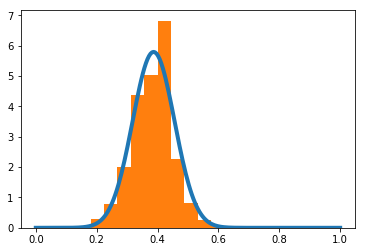

In [19]:
p = np.linspace(0,1,200)

plt.plot(p,stats.norm.pdf(p, loc = np.mean(population), scale = np.std(population)/(50 ** 0.5)), lw = 4)

plt.hist(bs_stats, bins = 10, density = True);

Visually, the theoretical distribution looks almost identical to the bootstrapped distribution. Let's compare how different the 95% confidence intervals are.

In [20]:
np.percentile(bs_stats, 2.5)

0.25950000000000006

In [21]:
np.percentile(bs_stats, 97.5)

0.52

The bootstrapped 95% confidence interval is (0.2595, 0.52).

<details><summary>Interpretation (we interpret it in the same way!)</summary>
We are 95% confident that the true population percentage of people who believe the country is headed in the right direction is 25.95% to 52%.
</details>

In [22]:
conf_int(sample)

(0.2455, 0.5145)

The bootstrapped 95% confidence interval is (0.2455, 0.5145).

<details><summary>Interpretation</summary>
We are 95% confident that the true population percentage of people who believe the country is headed in the right direction is 24.55% to 51.45%.
</details>

<details><summary> Extra Practice: From the polling example with the 3.1% margin of error above, what are the population, sample, statistics, and parameters? </summary>
    
- Our **population** is all registered voters.
- Our **sample** is the 1,000 voters who were polled for this situation. 
- Our **statistic** is: 
    - the sample percentage of "right direction" responses, $\hat{p}_{right} = 0.38$,
- Our **parameter** is:
    - the true population percentage of "right direction" responses, $p_{right}$.
</details>